Yue write the code at 2023/07/17

I just want to try using mathmatic/model way to compute the value of torque constant But it failed because the current input of three phase is derived by FOC but not constant.

In [4]:
import math
import matplotlib.pyplot as plt
import numpy as np

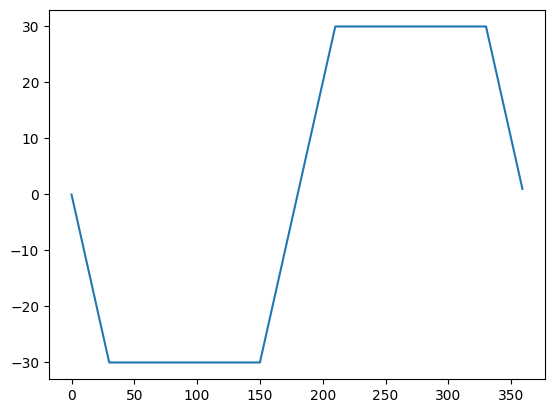

In [9]:
phi_list=[0,30,150,180,210,330,360];
# phi_list=phi_list/180*math.pi;
k=1 #slope of flux distrution curve

def flux_gradient(phi):
    if phi<=30:
        return -k*phi
    elif 30<phi<=150:
        return -30*k
    elif 150<phi<=210:
        return k*(phi-180)
    elif 210<phi<=330:
        return k*30
    elif 330<phi<=360:
        return -k*(phi-360)
    else:
        raise ValueError('input out of range of 0-360')
    
x=np.arange(0,360,1)

y=[]
for phi in x:
    y.append(flux_gradient(phi))
plt.plot(x,y)
plt.show()

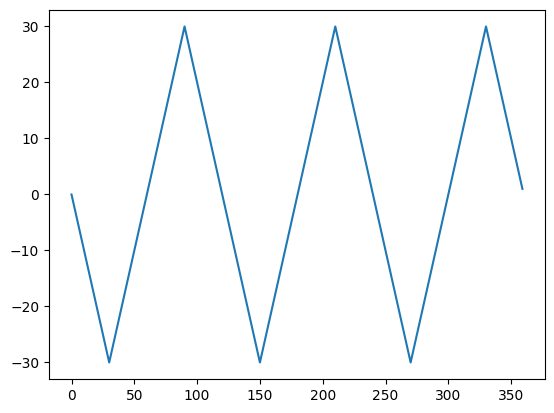

In [10]:
sum_gradient=[]
for phi in x:
    sum=flux_gradient(phi)+flux_gradient((phi-120)%360)+flux_gradient((phi+120)%360)
    sum_gradient.append(sum)
plt.plot(x,sum_gradient)
plt.show()

#wrong! cause current is not constant